# Getting comfortable with PyMongo

----

- List database

- List collections

- Retrieving documents
> - [find()](https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.find) - To retrieve all documents.
> - [find_one()](https://pymongo.readthedocs.io/en/stable/tutorial.html#getting-a-single-document-with-find-one) - To retrieve single document.

- [Cursor methods](https://docs.mongodb.com/manual/reference/method/js-cursor/)

> - [skip()](https://docs.mongodb.com/manual/reference/method/cursor.skip/) - To control where MongoDB begins returning results.
> - [limit()](https://docs.mongodb.com/manual/reference/method/cursor.limit/) - Returns limited number of documents.
> - [sort()](https://docs.mongodb.com/manual/reference/method/cursor.sort/#mongodb-method-cursor.sort) - Specifies the order in which the query returns matching documents.
> - [count()](https://docs.mongodb.com/manual/reference/method/db.collection.count/) - Count documents in a collection.

- [Project fields to return from query.](https://docs.mongodb.com/manual/tutorial/project-fields-from-query-results/)

- [distinct()](https://docs.mongodb.com/manual/reference/method/db.collection.distinct/) - A collection method to find out distinct values for a field in a collection.


----

In [1]:
# Importing the required libraries
import pymongo

In [2]:
# Connect to the mongo client - Atlas Cluster
# client = pymongo.MongoClient('<connection_string>')

# # Connect to the Atlas Cluster
# go to Atlas cluster dashboard
import urllib
client = pymongo.MongoClient('mongodb+srv://Parinita-Jain:'+urllib.parse.quote_plus("Silver@19")+'@cluster0.kk9aans.mongodb.net/?retryWrites=true&w=majority')

In [3]:
# Connect to local MongoDB server
# client = pymongo.MongoClient('mongodb://localhost:27017/')

---
### List databases.

---

In [3]:
# List databases
client.list_database_names()

['atlas_demo',
 'sample_airbnb',
 'sample_analytics',
 'sample_geospatial',
 'sample_guides',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'admin',
 'local']

---
Choose a database.

---

In [4]:
# Choose a database
db = client.sample_analytics

---
### List collections of a database.

----

In [5]:
# List collections
db.list_collection_names()

['transactions', 'customers', 'accounts']

---
### Reading documents with find_one()

----

Return only one document with [find_one()](https://docs.mongodb.com/manual/reference/method/db.collection.findOne/).

View `transactions` document.


----

In [6]:
# transactins document
db.transactions.find_one()

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb8'),
 'account_id': 996263,
 'transaction_count': 77,
 'bucket_start_date': datetime.datetime(1988, 1, 15, 0, 0),
 'bucket_end_date': datetime.datetime(2017, 1, 9, 0, 0),
 'transactions': [{'date': datetime.datetime(2015, 12, 30, 0, 0),
   'amount': 4195,
   'transaction_code': 'buy',
   'symbol': 'msft',
   'price': '53.958845773894836383988149464130401611328125',
   'total': '226357.3580214888386308302870'},
  {'date': datetime.datetime(2005, 11, 14, 0, 0),
   'amount': 3208,
   'transaction_code': 'sell',
   'symbol': 'crm',
   'price': '7.04231336158449661155600551865063607692718505859375',
   'total': '22591.74126396306512987166570'},
  {'date': datetime.datetime(2012, 6, 26, 0, 0),
   'amount': 6482,
   'transaction_code': 'sell',
   'symbol': 'crm',
   'price': '33.76911441107507272363363881595432758331298828125',
   'total': '218891.3996125886213945932468'},
  {'date': datetime.datetime(2012, 3, 19, 0, 0),
   'amount': 2867,
   'transact

---
For better formatting of output documents, use the `pprint` library.

---

In [7]:
# Import library
import pprint as pp

In [8]:
# transactins document
pp.pprint(
    db.transactions.find_one()
)

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb8'),
 'account_id': 996263,
 'bucket_end_date': datetime.datetime(2017, 1, 9, 0, 0),
 'bucket_start_date': datetime.datetime(1988, 1, 15, 0, 0),
 'transaction_count': 77,
 'transactions': [{'amount': 4195,
                   'date': datetime.datetime(2015, 12, 30, 0, 0),
                   'price': '53.958845773894836383988149464130401611328125',
                   'symbol': 'msft',
                   'total': '226357.3580214888386308302870',
                   'transaction_code': 'buy'},
                  {'amount': 3208,
                   'date': datetime.datetime(2005, 11, 14, 0, 0),
                   'price': '7.04231336158449661155600551865063607692718505859375',
                   'symbol': 'crm',
                   'total': '22591.74126396306512987166570',
                   'transaction_code': 'sell'},
                  {'amount': 6482,
                   'date': datetime.datetime(2012, 6, 26, 0, 0),
                   'price': '33.769

---
View `customers` document.

---

In [9]:
# customers document
pp.pprint(
    db.customers.find_one()
)

{'_id': ObjectId('5ca4bbcea2dd94ee58162a83'),
 'accounts': [607567, 429282],
 'address': '69809 Morris Extensions\nTaylorhaven, ME 37916',
 'birthdate': datetime.datetime(1976, 10, 31, 19, 39, 51),
 'email': 'kristen30@yahoo.com',
 'name': 'Steven Campbell',
 'tier_and_details': {},
 'username': 'rodriguezjeffrey'}


---
---
View `accounts` document.

----

In [10]:
# accounts document
db.accounts.find_one()

{'_id': ObjectId('5ca4bbc7a2dd94ee58162393'),
 'account_id': 328304,
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}

----
### Reading documents with find()

----
Returning documents from a collection using [find()](https://docs.mongodb.com/manual/reference/method/db.collection.find/) which returns cursor to documents in a collection.

*A cursor is an indicator that points to a specific position. In databases, a cursor references the records in the database. It helps in traversal over the records.*

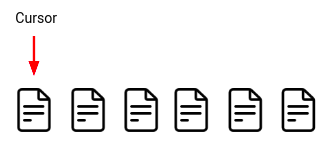

----


In [11]:
# find() returns a cursor
db.accounts.find()

---
To view the documents referenced by the cursor, need to iterate the cursor to view the documents.

----

In [12]:
# Cursor
cur = db.accounts.find()

# Print documents
for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162393'),
 'account_id': 328304,
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816238e'),
 'account_id': 198100,
 'limit': 10000,
 'products': ['Derivatives', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162390'),
 'account_id': 278603,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162394'),
 'account_id': 487188,
 'limit': 10000,
 'products': ['Brokerage', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162396'),
 'account_id': 260499,
 'limit': 10000,
 'products': ['InvestmentFund', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816239e'),
 'account_id': 299072,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a1'),
 'account_id': 977982,
 'limit': 10000,
 'products': ['InvestmentFund'

 'account_id': 891056,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a0'),
 'account_id': 572981,
 'limit': 10000,
 'products': ['InvestmentStock', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a6'),
 'account_id': 353465,
 'limit': 10000,
 'products': ['CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a9'),
 'account_id': 324287,
 'limit': 10000,
 'products': ['Commodity', 'CurrencyService', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623aa'),
 'account_id': 403363,
 'limit': 10000,
 'products': ['CurrencyService',
              'InvestmentFund',
              'InvestmentStock',
              'Derivatives']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623ae'),
 'account_id': 423171,
 'limit': 10000,
 'products': ['Brokerage', 'CurrencyService', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623b7'),
 'account_id': 599752,
 'limit': 10000,
 

----
### [Cursor methods for find()](https://docs.mongodb.com/manual/reference/method/js-cursor/)

These methods modify the way that the underlying query is executed.


- [skip()](https://docs.mongodb.com/manual/reference/method/cursor.skip/) - To control where MongoDB begins returning results.

- [limit()](https://docs.mongodb.com/manual/reference/method/cursor.limit/) - Returns limited number of documents.

- [sort()](https://docs.mongodb.com/manual/reference/method/cursor.sort/#mongodb-method-cursor.sort) - Specifies the order in which the query returns matching documents.

- [count()](https://docs.mongodb.com/manual/reference/method/cursor.count/) - Count documents in a collection.

----
**`skip()`**

Using `skip()` function on cursor allows to control where MongoDB begins returning the documents.

For example, we can skip first 2 documents and retrurn the rest of the documents in the collection.

---

In [13]:
# Cursor with all documents
cur = db.accounts.find()

# Print documents
for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162393'),
 'account_id': 328304,
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816238e'),
 'account_id': 198100,
 'limit': 10000,
 'products': ['Derivatives', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162390'),
 'account_id': 278603,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162394'),
 'account_id': 487188,
 'limit': 10000,
 'products': ['Brokerage', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162396'),
 'account_id': 260499,
 'limit': 10000,
 'products': ['InvestmentFund', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816239e'),
 'account_id': 299072,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a1'),
 'account_id': 977982,
 'limit': 10000,
 'products': ['InvestmentFund'

 'account_id': 950785,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816279b'),
 'account_id': 489563,
 'limit': 10000,
 'products': ['Derivatives', 'Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816279c'),
 'account_id': 835570,
 'limit': 10000,
 'products': ['CurrencyService',
              'Brokerage',
              'Derivatives',
              'Commodity',
              'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581627a3'),
 'account_id': 770312,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581627af'),
 'account_id': 570451,
 'limit': 10000,
 'products': ['Commodity', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581627b1'),
 'account_id': 524171,
 'limit': 10000,
 'products': ['Commodity', 'Brokerage', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581627b9'),
 'account_id': 797297,
 'limit': 10000,
 'produ

In [14]:
# Cursor with 2 skipped documents
cur = db.accounts.find().skip(2)

# Print documents
for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162390'),
 'account_id': 278603,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162394'),
 'account_id': 487188,
 'limit': 10000,
 'products': ['Brokerage', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162396'),
 'account_id': 260499,
 'limit': 10000,
 'products': ['InvestmentFund', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816239e'),
 'account_id': 299072,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a1'),
 'account_id': 977982,
 'limit': 10000,
 'products': ['InvestmentFund',
              'Derivatives',
              'InvestmentStock',
              'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623ad'),
 'account_id': 383701,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623b2'),
 'account_id': 209363,
 'l

{'_id': ObjectId('5ca4bbc7a2dd94ee58162761'),
 'account_id': 111287,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock', 'Derivatives', 'InvestmentFund']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162763'),
 'account_id': 667014,
 'limit': 10000,
 'products': ['InvestmentFund', 'Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162765'),
 'account_id': 461954,
 'limit': 9000,
 'products': ['InvestmentStock', 'Derivatives', 'InvestmentFund']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816276f'),
 'account_id': 891056,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a0'),
 'account_id': 572981,
 'limit': 10000,
 'products': ['InvestmentStock', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a6'),
 'account_id': 353465,
 'limit': 10000,
 'products': ['CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a9'),
 'account_id': 324287,
 'limit': 10000,
 'products': ['Commodity', 'Curren

---
**`limit()`**

Can limit the documents returned by the cursor using `limit()` function.

For example, return only first 5 documents from the collection.

---

In [15]:
# Return only first 5 documents
cur = db.accounts.find().limit(5)

for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162393'),
 'account_id': 328304,
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816238e'),
 'account_id': 198100,
 'limit': 10000,
 'products': ['Derivatives', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162390'),
 'account_id': 278603,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162394'),
 'account_id': 487188,
 'limit': 10000,
 'products': ['Brokerage', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162396'),
 'account_id': 260499,
 'limit': 10000,
 'products': ['InvestmentFund', 'Derivatives', 'InvestmentStock']}


---
**`sort()`**

Specifies the order in which the query returns matching documents using `sort()` function.

For example, sort all the documents according to `_id` field.

---

In [16]:
# Sort documents according to _id field value
cur = db.accounts.find().sort(
                                [('_id',pymongo.ASCENDING)]
                            )

for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee5816238c'),
 'account_id': 371138,
 'limit': 9000,
 'products': ['Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816238d'),
 'account_id': 557378,
 'limit': 10000,
 'products': ['InvestmentStock', 'Commodity', 'Brokerage', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816238e'),
 'account_id': 198100,
 'limit': 10000,
 'products': ['Derivatives', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816238f'),
 'account_id': 674364,
 'limit': 10000,
 'products': ['InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162390'),
 'account_id': 278603,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162391'),
 'account_id': 383777,
 'limit': 10000,
 'products': ['CurrencyService',
              'Derivatives',
              'InvestmentFund',
              'Commodity',
              'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162392'),
 'accou

{'_id': ObjectId('5ca4bbc7a2dd94ee581623f3'),
 'account_id': 858473,
 'limit': 10000,
 'products': ['Brokerage', 'InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623f4'),
 'account_id': 827843,
 'limit': 10000,
 'products': ['Brokerage', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623f5'),
 'account_id': 644552,
 'limit': 10000,
 'products': ['Commodity',
              'InvestmentFund',
              'CurrencyService',
              'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623f6'),
 'account_id': 682405,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623f7'),
 'account_id': 299100,
 'limit': 10000,
 'products': ['InvestmentStock', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623f8'),
 'account_id': 166084,
 'limit': 10000,
 'products': ['InvestmentFund', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623f9'),
 'account_id': 664679,
 'limi

{'_id': ObjectId('5ca4bbc7a2dd94ee58162676'),
 'account_id': 586861,
 'limit': 10000,
 'products': ['InvestmentFund', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162677'),
 'account_id': 753126,
 'limit': 10000,
 'products': ['InvestmentStock', 'CurrencyService', 'Commodity', 'Derivatives']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162678'),
 'account_id': 530132,
 'limit': 10000,
 'products': ['Derivatives', 'Brokerage', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162679'),
 'account_id': 467666,
 'limit': 10000,
 'products': ['Brokerage', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816267a'),
 'account_id': 58303,
 'limit': 10000,
 'products': ['CurrencyService', 'Derivatives', 'Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816267b'),
 'account_id': 216662,
 'limit': 10000,
 'products': ['Brokerage', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816267c'),
 'account_id': 558061,
 'limit'

{'_id': ObjectId('5ca4bbc7a2dd94ee58162914'),
 'account_id': 880595,
 'limit': 10000,
 'products': ['CurrencyService', 'Commodity', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162915'),
 'account_id': 720825,
 'limit': 10000,
 'products': ['InvestmentStock', 'Commodity']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162916'),
 'account_id': 943953,
 'limit': 10000,
 'products': ['CurrencyService', 'InvestmentStock', 'Commodity']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162917'),
 'account_id': 133274,
 'limit': 10000,
 'products': ['CurrencyService',
              'Derivatives',
              'InvestmentFund',
              'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162918'),
 'account_id': 189806,
 'limit': 10000,
 'products': ['CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162919'),
 'account_id': 635729,
 'limit': 10000,
 'products': ['InvestmentFund', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816291a

---
Sort all the documents according to `_id` field in descending order.

---

In [17]:
# Sort documents according to _id field value
cur = db.accounts.find().sort(
                                [('_id',pymongo.DESCENDING)]
                            )

for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162a60'),
 'account_id': 291224,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5f'),
 'account_id': 351063,
 'limit': 10000,
 'products': ['InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5e'),
 'account_id': 684319,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5d'),
 'account_id': 206062,
 'limit': 10000,
 'products': ['InvestmentStock', 'CurrencyService', 'Derivatives']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5c'),
 'account_id': 89698,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5b'),
 'account_id': 635650,
 'limit': 10000,
 'products': ['Brokerage', 'InvestmentStock', 'InvestmentFund']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5a'),
 'account_id': 963591,
 'limit': 10000,
 'products': ['Commodity', 'CurrencyService', 'Derivatives', 'InvestmentStock']}
{'_id

{'_id': ObjectId('5ca4bbc7a2dd94ee581629fb'),
 'account_id': 651827,
 'limit': 10000,
 'products': ['CurrencyService',
              'Commodity',
              'Derivatives',
              'Brokerage',
              'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581629fa'),
 'account_id': 933986,
 'limit': 10000,
 'products': ['Brokerage', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581629f9'),
 'account_id': 951661,
 'limit': 10000,
 'products': ['Commodity', 'Brokerage', 'InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581629f8'),
 'account_id': 218657,
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581629f7'),
 'account_id': 879203,
 'limit': 10000,
 'products': ['InvestmentStock', 'Derivatives', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581629f6'),
 'account_id': 385319,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a

{'_id': ObjectId('5ca4bbc7a2dd94ee581626cb'),
 'account_id': 952430,
 'limit': 10000,
 'products': ['Derivatives', 'Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581626ca'),
 'account_id': 351905,
 'limit': 10000,
 'products': ['Brokerage',
              'InvestmentFund',
              'CurrencyService',
              'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581626c9'),
 'account_id': 377488,
 'limit': 10000,
 'products': ['InvestmentFund', 'Brokerage', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581626c8'),
 'account_id': 209755,
 'limit': 10000,
 'products': ['CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581626c7'),
 'account_id': 923502,
 'limit': 10000,
 'products': ['Commodity', 'Brokerage', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581626c6'),
 'account_id': 933061,
 'limit': 10000,
 'products': ['Brokerage',
              'InvestmentFund',
              'CurrencyService',
              'InvestmentS

{'_id': ObjectId('5ca4bbc7a2dd94ee58162622'),
 'account_id': 973364,
 'limit': 10000,
 'products': ['Brokerage', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162621'),
 'account_id': 654939,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162620'),
 'account_id': 965514,
 'limit': 10000,
 'products': ['CurrencyService',
              'Brokerage',
              'InvestmentFund',
              'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816261f'),
 'account_id': 956881,
 'limit': 10000,
 'products': ['Commodity',
              'CurrencyService',
              'Derivatives',
              'Brokerage',
              'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816261e'),
 'account_id': 719343,
 'limit': 10000,
 'products': ['Brokerage', 'Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816261d'),
 'account_id': 867593,
 'limit': 10000,
 'products': ['Brokerage', 'Invest

---
Combine `sort()` with `limit()`.

For example, return last 5 documents from collection according to `_id` field.

We query `sort()` on the `_id` field in descending order and return last 5 documents.


---

In [18]:
# Last 5 documents according to _id field
cur = db.accounts.find()\
                 .sort([('_id',pymongo.DESCENDING)])\
                 .limit(5)

for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162a60'),
 'account_id': 291224,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5f'),
 'account_id': 351063,
 'limit': 10000,
 'products': ['InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5e'),
 'account_id': 684319,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5d'),
 'account_id': 206062,
 'limit': 10000,
 'products': ['InvestmentStock', 'CurrencyService', 'Derivatives']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5c'),
 'account_id': 89698,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}


---
---
**`count()`**

`count()` counts the number of documents referenced by the cursor.

For example, count all the number of documents in the `accounts` collection.

If we provide `find()` without any query, then it will reference all the documents in the collection.

---

In [81]:
# Count documents in `accounts` collection
len(list(db.accounts.find()))#.count()

1746

---
### Basic querying
---
Basic querying in a collection by providing the query expression.

For example, return first document where `limit` is 10000.

---

In [82]:
# Return document where 'limit' is 10000
pp.pprint(
    db.accounts.find_one({'limit':10000})
)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162393'),
 'account_id': 328304,
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}


---
Find all documents where the `limit` is 10000.

----

In [83]:
# Return all documents where 'limit' is 10000
cur = db.accounts.find({'limit':10000})

for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162393'),
 'account_id': 328304,
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816238e'),
 'account_id': 198100,
 'limit': 10000,
 'products': ['Derivatives', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162390'),
 'account_id': 278603,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162394'),
 'account_id': 487188,
 'limit': 10000,
 'products': ['Brokerage', 'CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162396'),
 'account_id': 260499,
 'limit': 10000,
 'products': ['InvestmentFund', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816239e'),
 'account_id': 299072,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee581623a1'),
 'account_id': 977982,
 'limit': 10000,
 'products': ['InvestmentFund'

 'products': ['CurrencyService', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162931'),
 'account_id': 744220,
 'limit': 10000,
 'products': ['Brokerage', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162945'),
 'account_id': 591359,
 'limit': 10000,
 'products': ['Brokerage', 'InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162948'),
 'account_id': 765127,
 'limit': 10000,
 'products': ['CurrencyService', 'Commodity', 'Brokerage', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee5816294c'),
 'account_id': 322023,
 'limit': 10000,
 'products': ['Commodity', 'Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162955'),
 'account_id': 570599,
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162958'),
 'account_id': 671031,
 'limit': 10000,
 'products': ['CurrencyService',
              'Commodity',
              'InvestmentFund',
              'Investm

--- 
Retrieve documents using multiple query expressions.

For example, retrieve all documents where the `limit` is 10000 and `account_id` is 635650.

---

In [84]:
# Retrieve documents based on multiple queries
cur = db.accounts.find({
                        'limit':10000,
                        'account_id':635650
                    })

for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5b'),
 'account_id': 635650,
 'limit': 10000,
 'products': ['Brokerage', 'InvestmentStock', 'InvestmentFund']}


---
We can apply all cursor methods to find() along with the query expression.

There cursor methods will be applied to documents that match the query expression.

For example, count the number of documents where the `limit` is 10000.

----

In [85]:
# Count documents where the `limit` is 10000
len(list(db.accounts.find({'limit':10000})))#.count()

1701

---
Return the last 5 documents, sorted according to `_id` field, where the `limit` is 10000.

----

In [86]:
# Return last 5 docs where `limit` is 10000
cur = db.accounts.find({'limit':10000})\
                 .sort([('_id', pymongo.DESCENDING)])\
                 .limit(5)

for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162a60'),
 'account_id': 291224,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5f'),
 'account_id': 351063,
 'limit': 10000,
 'products': ['InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5e'),
 'account_id': 684319,
 'limit': 10000,
 'products': ['InvestmentFund', 'InvestmentStock']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5d'),
 'account_id': 206062,
 'limit': 10000,
 'products': ['InvestmentStock', 'CurrencyService', 'Derivatives']}
{'_id': ObjectId('5ca4bbc7a2dd94ee58162a5c'),
 'account_id': 89698,
 'limit': 10000,
 'products': ['Commodity', 'InvestmentStock']}


----
### [Projection document](https://docs.mongodb.com/manual/tutorial/project-fields-from-query-results/)

----
Retrieve only specific fields from matched document with `projection`.

If you mention explicitly which fields to project, then other fields will automatically be suppressed from output.

For example, project only `products` field from document. 

----

In [87]:
# Project only specific keys
pp.pprint(
    db.accounts.find_one(
                         # query expression
                         {
                            'limit':10000
                         },
                        # projection
                         {
                             'products':1
                         }
    )
)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162393'),
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}


---
Project only `limit` and `products` fields from documents where `limit` is 10000.

---

In [88]:
# Project only specific keys
pp.pprint(
    db.accounts.find_one(
                         # query expression
                         {
                             'limit':10000
                         },
                         # projection
                         {
                             'products':1,
                             'limit':1
                         }
    )
)

{'_id': ObjectId('5ca4bbc7a2dd94ee58162393'),
 'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}


----
`_id` field has to be explicitly turned off from projection.

----

In [89]:
# Do not return _id field
pp.pprint(
    db.accounts.find_one(
                         # query expression
                         {
                             'limit':10000
                         },
                         # projection
                         {
                             'limit':1,
                             'products':1,
                             '_id':0
                         })
)

{'limit': 10000,
 'products': ['Derivatives', 'InvestmentStock', 'CurrencyService']}


---
### [distinct()](https://docs.mongodb.com/manual/reference/method/db.collection.distinct/) collection method
---

Number of unique values in a field can be found out with `distinct()` function.

For example, distinct values in `limit` field.

---

In [90]:
# Distinct values in `limit` field
db.accounts.distinct('limit')

[3000, 5000, 7000, 8000, 9000, 10000]

---
Number of unique values can be found using the `len()` function of Python.

---

In [91]:
len(db.accounts.distinct('limit'))

6